PyTorch

In [ ]:
import torch

In [138]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
c = torch.tensor(4., requires_grad=True)

# Build a computational graph.
y1 = (w + c) * x ** 4

# Compute gradients.
y1.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 24 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = None
print(c.grad)    # c.grad = 1



tensor(24.)
tensor(1.)
None
tensor(1.)


In [139]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

print(x)
print(y)

tensor([[ 0.5123, -1.2628,  0.5932],
        [-1.0547,  0.2316,  0.4448],
        [-0.0210,  0.5076, -2.2224],
        [-1.3528,  0.3813, -0.7820],
        [ 0.5574, -0.3144,  0.4851],
        [-1.0230, -0.1184,  0.5444],
        [ 0.4536,  1.4573, -0.7431],
        [ 0.2600,  0.2199, -0.6997],
        [-0.9485,  1.0692,  0.9469],
        [-1.1429,  0.3340,  0.1349]])
tensor([[-0.2252,  1.2394],
        [-0.7511, -0.4727],
        [-1.2121, -0.7498],
        [-0.0362, -0.4992],
        [-1.0245, -0.0274],
        [-0.9688, -0.4014],
        [ 1.1245,  0.5743],
        [ 0.7331, -0.5727],
        [ 2.2907, -0.5342],
        [ 0.7883,  0.2393]])


In [140]:
# Build a fully connected layer.
linear = torch.nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3697,  0.2006,  0.2974],
        [-0.5574,  0.0013, -0.0066]], requires_grad=True)
b:  Parameter containing:
tensor([0.5231, 0.4254], requires_grad=True)


In [141]:
# Build loss function and optimizer.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.2394694089889526


In [142]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[ 0.1134, -0.3527, -0.1116],
        [-0.8085,  0.4257, -0.1951]])
dL/db:  tensor([0.3239, 0.7565])


In [143]:
# 1-step gradient descent.
optimizer.step()

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

loss after 1 step optimization:  1.2225744724273682


Datasets

In [87]:
import torchvision

# Download and construct CIFAR100 dataset.
train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True, 
                                             transform=torchvision.transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
torch.Size([3, 32, 32])
19


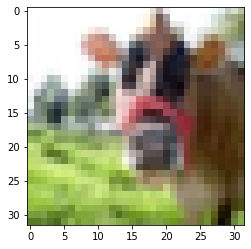

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


plt.imshow(torchvision.transforms.ToPILImage()(image))

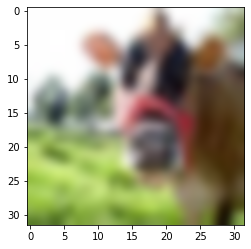

In [84]:
plt.imshow(torchvision.transforms.ToPILImage()(image), interpolation="bicubic")

My own picture

torch.Size([47, 70])


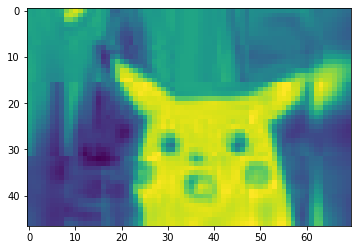

In [152]:
transform = torchvision.transforms.ToTensor()
train_loader = torch.utils.data.DataLoader(dataset=transform(Image.open('/content/pikachu.jpg')),
                                           batch_size=64, 
                                           shuffle=True)

image = train_dataset[0]
print(image.size())

plt.imshow(torchvision.transforms.ToPILImage()(image))

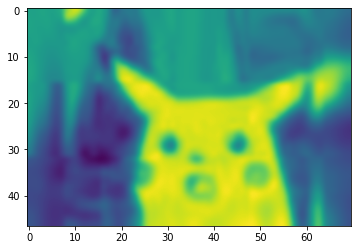

In [145]:
plt.imshow(torchvision.transforms.ToPILImage()(image), interpolation="bicubic")